In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
import io
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.metrics import log_loss, auc, roc_auc_score, roc_curve, average_precision_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import mean_squared_error
from sklearn import svm

import random

import missingno
import sklearn

import xgboost as xgb
from xgboost import plot_tree

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# File located in google drive
url = "https://drive.google.com/uc?export=download&id=1pYKNCwkfdr42SFO0TQjpbbF2luFAHZLW"

file = requests.get(url).content
df = pd.read_csv(io.StringIO(file.decode('utf-8')))

df = df.sample(frac=0.1, random_state = 117, axis = 0)

In [2]:
X = df.drop(['New_ID','month','day', 'y', 'balance'], axis = 1)
Y = df['y']

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 21523 to 40358
Data columns (total 13 columns):
job          4521 non-null int64
education    4521 non-null int64
contact      4521 non-null int64
poutcome     4521 non-null int64
age          4521 non-null int64
marital      4521 non-null int64
default      4521 non-null int64
housing      4521 non-null int64
loan         4521 non-null int64
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
dtypes: int64(13)
memory usage: 494.5 KB


In [4]:
X = pd.DataFrame(X)

In [5]:
X.head()

,job,education,contact,poutcome,age,marital,default,housing,loan,duration,campaign,pdays,previous
21523,5,2,1,1,60,1,0,0,0,276,2,-1,0
18080,7,2,2,1,32,1,0,0,1,96,6,-1,0
28962,4,2,1,2,48,2,0,0,0,167,1,263,3
22422,2,2,1,1,49,1,0,1,1,73,15,-1,0
11522,7,3,1,1,40,1,0,0,1,202,2,-1,0


In [6]:
# Separate the data in Train & Test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42, shuffle = True, test_size = 0.2)
X_train.head()

,job,education,contact,poutcome,age,marital,default,housing,loan,duration,campaign,pdays,previous
2887,4,2,1,1,46,1,0,1,0,546,1,-1,0
25866,1,1,1,1,30,2,0,0,0,50,1,-1,0
3333,1,1,1,1,42,1,0,1,0,98,3,-1,0
28703,7,1,1,1,29,2,0,1,1,499,5,248,1
37424,4,2,1,1,45,1,0,1,0,154,2,350,3


In [7]:
columns = X.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = columns)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = columns)
X_test.head()

,job,education,contact,poutcome,age,marital,default,housing,loan,duration,campaign,pdays,previous
0,2.495377,0.224870,-0.266469,1.501214,-0.648374,-0.762266,-0.14644,-1.126131,-0.431402,-0.495613,-0.578279,-0.420201,-0.304636
1,-0.115824,1.766592,-0.266469,-0.447995,-0.359558,-0.762266,-0.14644,-1.126131,-0.431402,-0.341575,1.397842,-0.420201,-0.304636
2,-1.234911,-1.316852,-0.266469,-0.447995,-0.552102,-0.762266,-0.14644,-1.126131,-0.431402,-0.747674,-0.578279,-0.420201,-0.304636
3,1.749320,-1.316852,-0.266469,-0.447995,-0.648374,0.702385,-0.14644,0.887996,-0.431402,-0.565630,0.080428,-0.420201,-0.304636
4,-1.234911,-1.316852,-0.266469,-0.447995,-1.129735,0.702385,-0.14644,0.887996,-0.431402,-0.394088,-0.578279,-0.420201,-0.304636


In [8]:
Y_train.value_counts(normalize=True)

0    0.888274
1    0.111726
Name: y, dtype: float64

In [9]:
Y_test.value_counts(normalize=True)

0    0.886188
1    0.113812
Name: y, dtype: float64

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
   # fit_times_mean = np.mean(fit_times, axis=1)
   # fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    #axes[1].grid()
    #axes[1].plot(train_sizes, fit_times_mean, 'o-')
    #axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
    #                     fit_times_mean + fit_times_std, alpha=0.1)
    #axes[1].set_xlabel("Training examples")
    #axes[1].set_ylabel("fit_times")
    #axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
   # axes[2].grid()
   # axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
   # axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
   #                      test_scores_mean + test_scores_std, alpha=0.1)
   # axes[2].set_xlabel("fit_times")
   # axes[2].set_ylabel("Score")
   # axes[2].set_title("Performance of the model")

    return plt

# ----------------- End of Data Prep ----------------- 

In [11]:
%%time
clf = svm.SVC(random_state=42,kernel='linear',gamma='auto', C = 1, probability = True)
clf.fit(X_train, Y_train)

CPU times: user 1.43 s, sys: 3.77 ms, total: 1.43 s
Wall time: 1.43 s


SVC(C=1, gamma='auto', kernel='linear', probability=True, random_state=42)

In [12]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 61.2 ms, sys: 0 ns, total: 61.2 ms
Wall time: 59.9 ms


In [13]:
%%time
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.9183626838711269
Test AUC Score 0.8929254533568991
 
Acuracy  0.8917127071823204
ROC_AUC  0.8929254533568991
PR  0.46058713344655683
 
[[786  16]
 [ 82  21]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       802
           1       0.57      0.20      0.30       103

    accuracy                           0.89       905
   macro avg       0.74      0.59      0.62       905
weighted avg       0.87      0.89      0.87       905

CPU times: user 216 ms, sys: 3.84 ms, total: 220 ms
Wall time: 217 ms


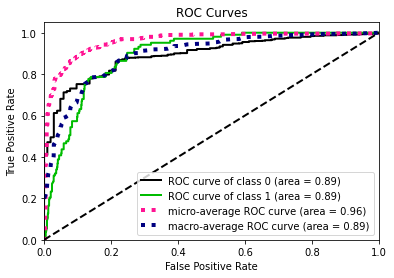

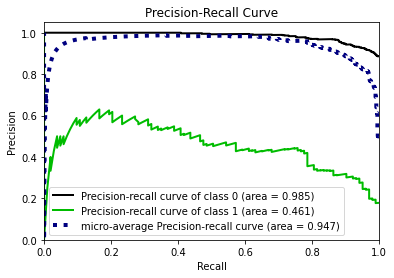

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

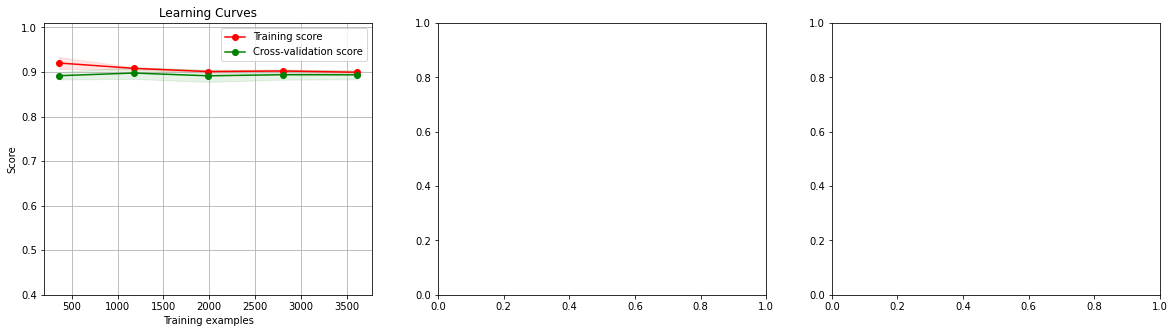

In [14]:
import scikitplot as skplt
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [16]:
clf.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [17]:
%%time
parameter_space = {
    'C': list(range(1,15))
    ,'kernel' : ['linear']
    ,'random_state' : [42]
}

eval_set = [(X_test, Y_test)]
GridSearch = GridSearchCV(svm.SVC(), param_grid = parameter_space, n_jobs=-1, cv=3)

GridSearch.fit(X_train, Y_train)

CPU times: user 352 ms, sys: 51.6 ms, total: 404 ms
Wall time: 4.76 s


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'kernel': ['linear'], 'random_state': [42]})

In [18]:
GridSearch.best_params_

{'C': 1, 'kernel': 'linear', 'random_state': 42}

In [36]:
%%time
clf = svm.SVC(random_state=42,kernel='linear', C = 7, probability = True)
clf.fit(X_train, Y_train)

CPU times: user 2.78 s, sys: 0 ns, total: 2.78 s
Wall time: 2.77 s


SVC(C=7, kernel='linear', probability=True, random_state=42)

In [37]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 57.3 ms, sys: 0 ns, total: 57.3 ms
Wall time: 56.3 ms


In [38]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.9183622985586228
Test AUC Score 0.8925501779531754
 
Acuracy  0.8917127071823204
ROC_AUC  0.8925501779531754
PR  0.4592979529965797
 
[[786  16]
 [ 82  21]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       802
           1       0.57      0.20      0.30       103

    accuracy                           0.89       905
   macro avg       0.74      0.59      0.62       905
weighted avg       0.87      0.89      0.87       905



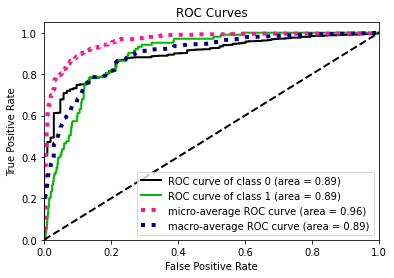

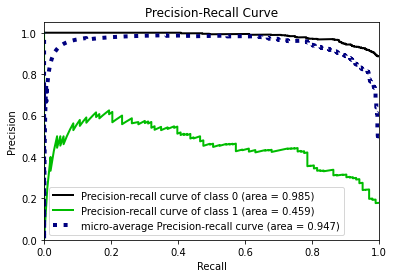

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

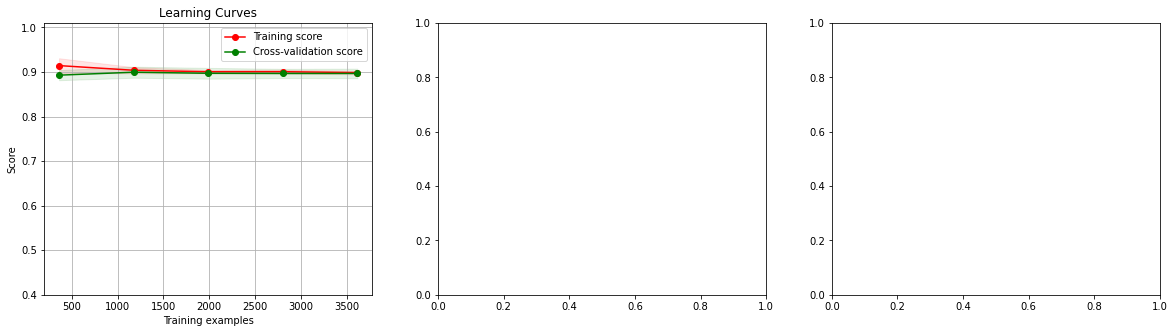

In [40]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [ ]:
clf.get_params()

In [32]:
%%time
clf = svm.SVC(random_state=42,kernel='rbf',gamma='scale', degree = 3, probability = True)
clf.fit(X_train, Y_train)

CPU times: user 1.9 s, sys: 0 ns, total: 1.9 s
Wall time: 1.9 s


SVC(probability=True, random_state=42)

In [33]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 190 ms, sys: 6.87 ms, total: 197 ms
Wall time: 196 ms


In [34]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.9386921568869216
Test AUC Score 0.8617291722150933
 
Acuracy  0.8983425414364641
ROC_AUC  0.8617291722150933
PR  0.4698665004649914
 
[[785  17]
 [ 75  28]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       802
           1       0.62      0.27      0.38       103

    accuracy                           0.90       905
   macro avg       0.77      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905



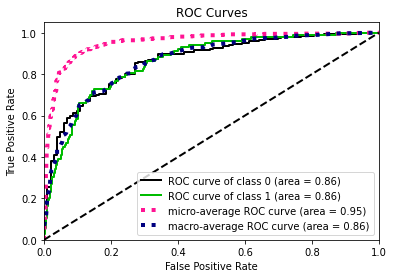

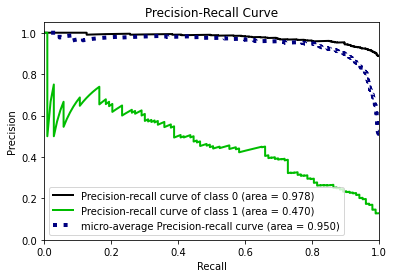

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

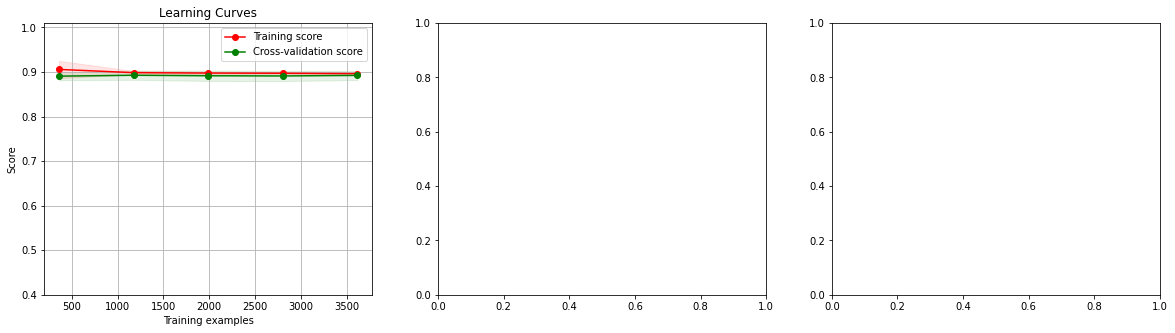

In [35]:
import scikitplot as skplt
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=-1)

In [28]:
%%time
clf = svm.SVC(random_state=42,kernel='rbf',gamma='scale', degree = 5, C = 5, probability = True)
clf.fit(X_train, Y_train)

CPU times: user 1.92 s, sys: 2.96 ms, total: 1.92 s
Wall time: 1.92 s


SVC(C=5, degree=5, probability=True, random_state=42)

In [29]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 198 ms, sys: 0 ns, total: 198 ms
Wall time: 197 ms


In [30]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.956766395817664
Test AUC Score 0.8613357383240927
 
Acuracy  0.8950276243093923
ROC_AUC  0.8613357383240927
PR  0.47393078431688024
 
[[779  23]
 [ 72  31]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       802
           1       0.57      0.30      0.39       103

    accuracy                           0.90       905
   macro avg       0.74      0.64      0.67       905
weighted avg       0.88      0.90      0.88       905



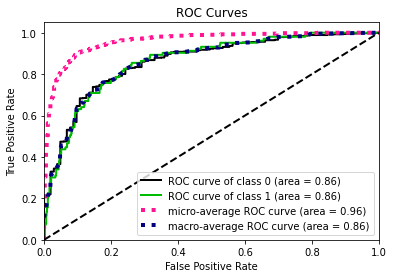

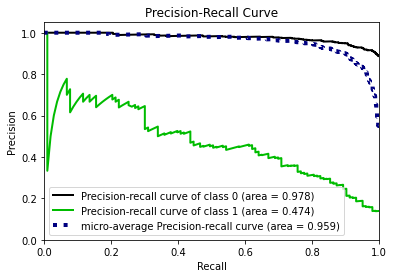

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

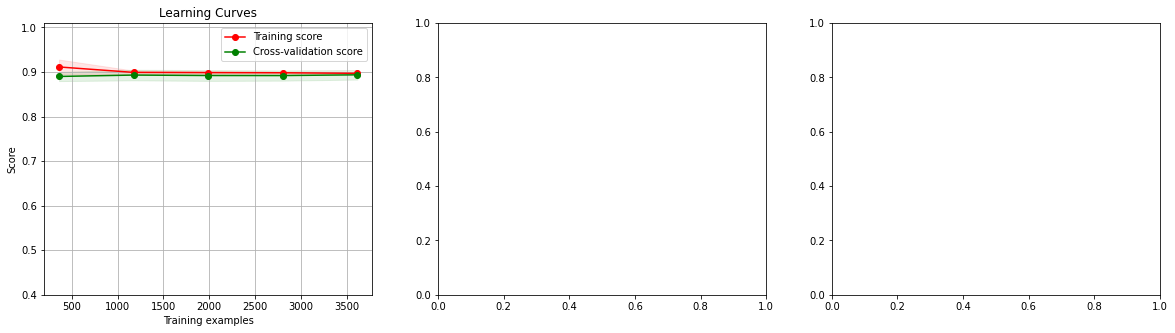

In [31]:
import scikitplot as skplt
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=-1)